DATA SET EXPLORATION

In [16]:
iris = datasets.load_iris()

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
iris



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

IRIS DATASETS PLOTS

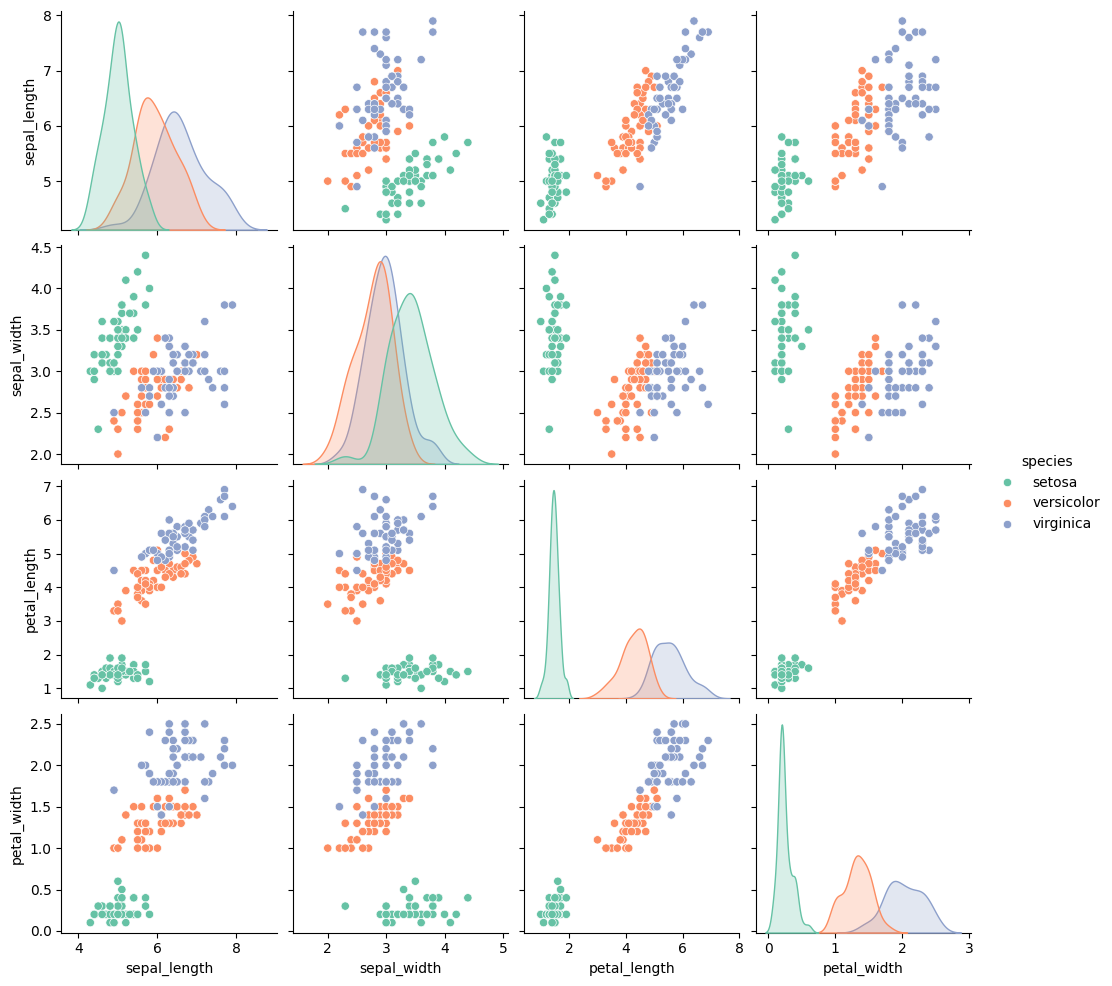

In [18]:
import seaborn as sns
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a pair plot
sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde")
plt.show()


PCA Representation

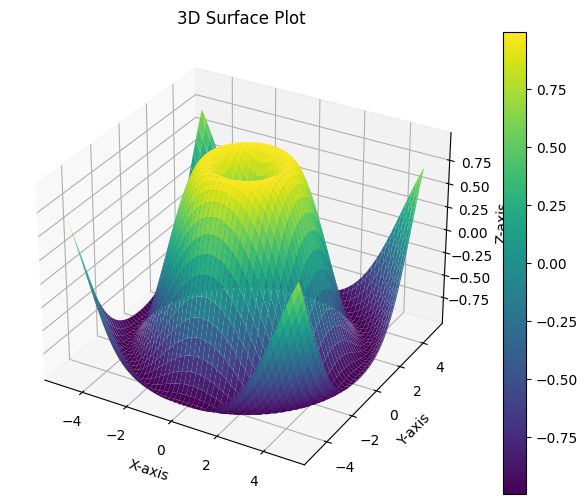

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generating random data for demonstration
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Creating a 3D surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Add color bar which maps values to colors
fig.colorbar(surf)

# Set labels
ax.set_title("3D Surface Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()


SVM Implementation

Parameters: {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}, Accuracy: 0.9649
Parameters: {'n_estimators': 200, 'max_depth': 8, 'random_state': 42}, Accuracy: 0.9649
Parameters: {'n_estimators': 300, 'max_depth': 10, 'random_state': 42}, Accuracy: 0.9649
Parameters: {'n_estimators': 500, 'max_depth': 12, 'random_state': 42}, Accuracy: 0.9649

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Additional Evaluation Metrics:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1-score: 0.9722222222222222


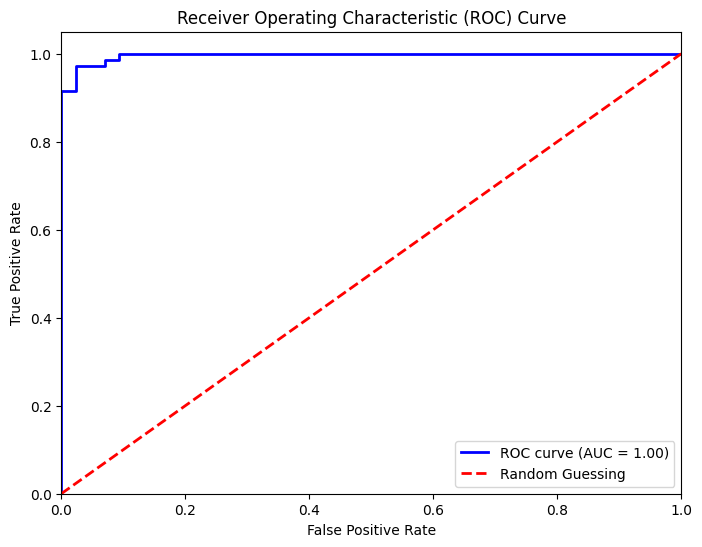

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


# Load the breast cancer dataset
cancer = load_breast_cancer()

# Step 1: Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, test_size=0.2, random_state=42)

# Step 2: Random Forest Implementation
# Define Random Forest classifier with different parameters
rf_params = [
    {'n_estimators': 100, 'max_depth': 5, 'random_state': 42},
    {'n_estimators': 200, 'max_depth': 8, 'random_state': 42},
    {'n_estimators': 300, 'max_depth': 10, 'random_state': 42},
    {'n_estimators': 500, 'max_depth': 12, 'random_state': 42}
]

best_score = 0
best_params = None

for params in rf_params:
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(X_train, y_train)
    accuracy = rf_model.score(X_test, y_test)
    print(f"Parameters: {params}, Accuracy: {accuracy:.4f}")

    if accuracy > best_score:
        best_score = accuracy
        best_params = params

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Predict the probabilities for the test set
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Predict the labels for the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


REP

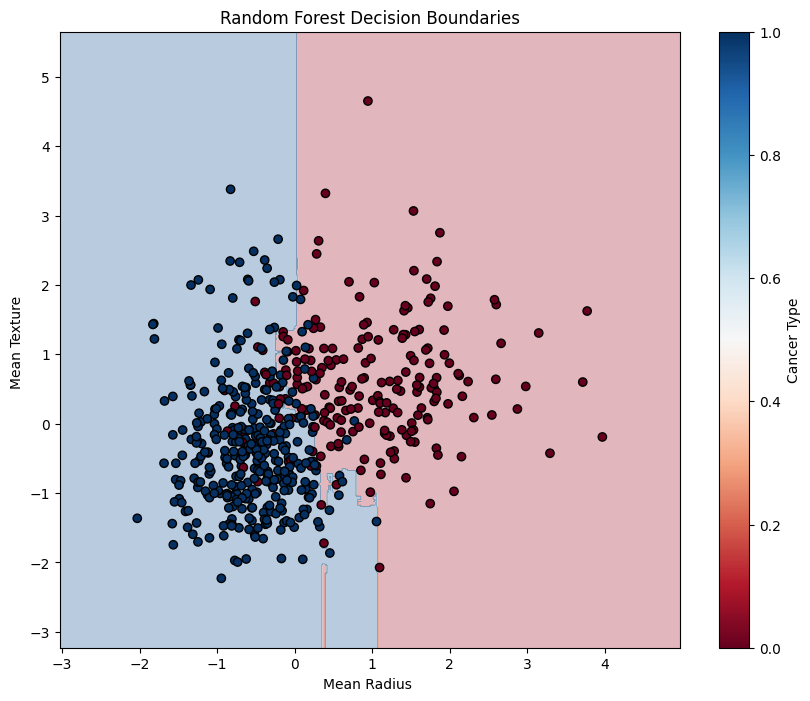

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Step 1: Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data[:, :2])  # Using only the first two features for visualization
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, test_size=0.2, random_state=42)

# Step 2: Random Forest Implementation
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Create a meshgrid of feature values
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for the meshgrid points
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cancer.target, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Mean Radius ')
plt.ylabel('Mean Texture ')
plt.title('Random Forest Decision Boundaries')
plt.colorbar(label='Cancer Type')
plt.show()


K-fold Cross-Validation

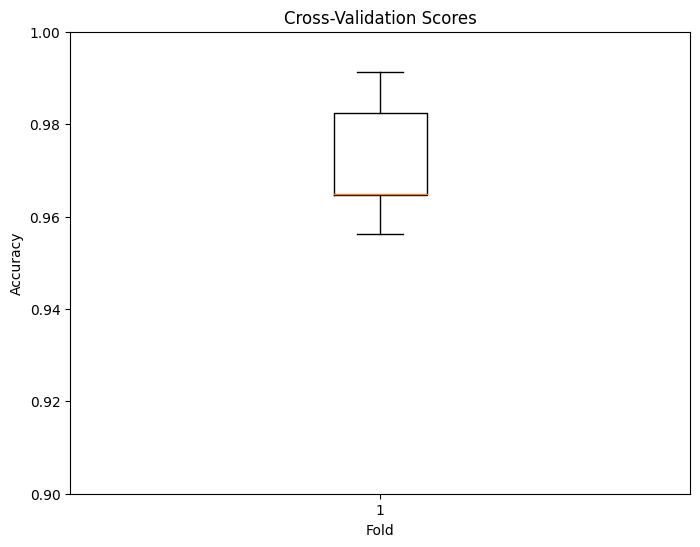

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Step 1: Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)
y = cancer.target

# Step 2: SVM Implementation
# Define SVM classifier
svm_model = SVC(kernel='linear', C=1)

# Apply K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# Visualize cross-validation scores using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Limit y-axis for better visualization
plt.show()


Evaluation Metrics


Confusion Matrix:


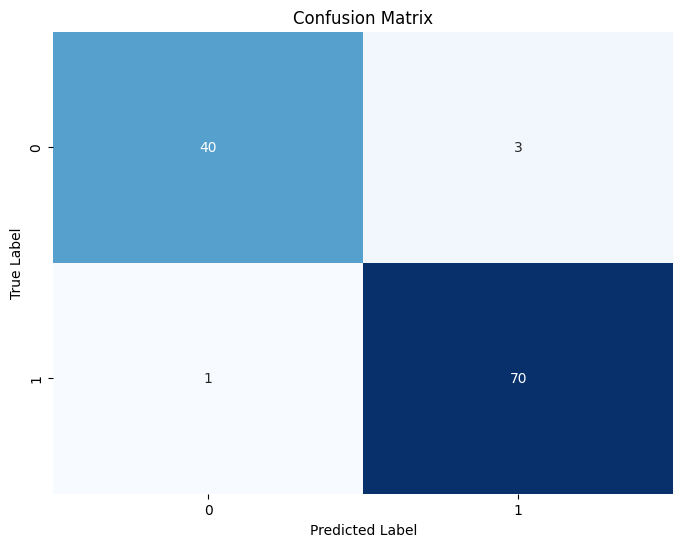


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<ipython-input-23-8185b766b2d1>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


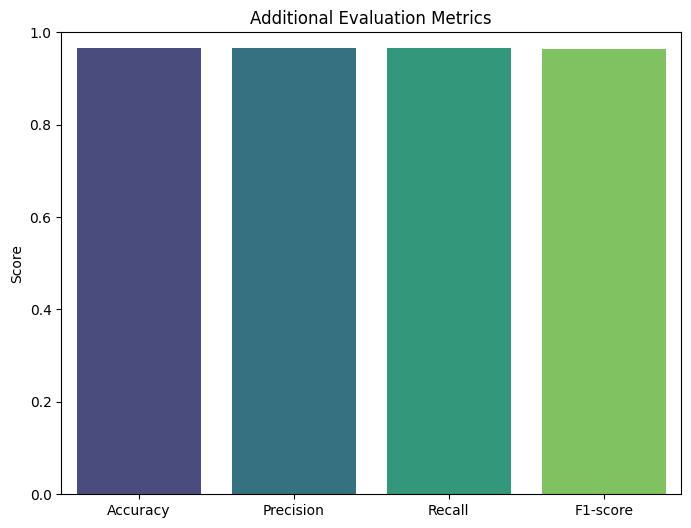

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Step 1: Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, test_size=0.2, random_state=42)

# Step 2: Random Forest Implementation
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Additional Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Visualize Additional Evaluation Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title('Additional Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0.0, 1.0)
plt.show()
